In [2]:
#Importing every necessary libraries for the analysis

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set(style = "darkgrid")

%matplotlib inline 



In [5]:
# Loading the datasets from the sql file and selecting the player attributes 

path = "../Personal/"
database = path + 'database.sqlite'

connection = sqlite3.connect(database)

Player_attributes = pd.read_sql("""SELECT * FROM Player_Attributes RIGHT JOIN Player ON Player_Attributes.player_fifa_api_id = Player.player_fifa_api_id;""", connection)
Player_attributes.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_kicking,gk_positioning,gk_reflexes,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,9.0,9.0,12.0,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,9.0,9.0,12.0,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,9.0,9.0,12.0,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,9.0,9.0,12.0,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,9.0,9.0,12.0,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


### Data cleaning 

In [6]:
#We examine the total number to rows and columns in the player attributes table

Player_attributes.shape

(183929, 49)

In [7]:
#we examine the statistics of the each features in the dataset

Player_attributes.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id,player_api_id,player_fifa_api_id,height,weight
count,183929.000000,183929.000000,183929.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183929.000000,183929.000000,183929.000000,183929.000000,183929.000000
mean,91978.226430,165662.576228,135896.548478,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,14.704393,16.063612,20.998362,16.132154,16.441439,5520.351483,135997.733272,165662.576228,181.872225,168.758581
std,53112.547342,53855.472340,136944.149783,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,16.865467,15.867382,21.452980,16.099175,17.198155,3191.233961,136961.096423,53855.472340,6.402514,15.104143
min,1.000000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,45983.000000,155787.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,2754.000000,34944.000000,155787.000000,177.800000,159.000000
50%,91965.000000,183486.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,10.000000,11.000000,12.000000,11.000000,11.000000,5533.000000,77774.000000,183486.000000,182.880000,168.000000
75%,137972.000000,199845.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,13.000000,15.000000,15.000000,15.000000,15.000000,8256.000000,191132.000000,199845.000000,185.420000,179.000000
max,183978.000000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,94.000000,93.000000,97.000000,96.000000,96.000000,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [8]:
# we check the data to see the columns with missing values using the info method 

Player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183929 entries, 0 to 183928
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183929 non-null  int64  
 1   player_fifa_api_id   183929 non-null  int64  
 2   player_api_id        183929 non-null  int64  
 3   date                 183929 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

From the above result it shows that some columns consist some missing value 

we remove the missing rows using the drop_na method below 

we also remove the attributes with norminal value and since we have different player id we make use of player_fifa_api_id because players are most likely to be rated with their fifa ID 

In [9]:
Player_attributes = Player_attributes.dropna()
Player_attributes = Player_attributes.drop(['player_api_id', 'preferred_foot', 'id'], axis=1)
Player_attributes.isnull().sum()

player_fifa_api_id     0
date                   0
overall_rating         0
potential              0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
player_name            0


In [10]:
Player_attributes = Player_attributes.loc[:, ~Player_attributes.columns.duplicated()].copy()

In [11]:
Player_attributes.head()

,player_fifa_api_id,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,218353,2016-02-18 00:00:00,67.0,71.0,medium,medium,49.0,44.0,71.0,61.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,218353,2015-11-19 00:00:00,67.0,71.0,medium,medium,49.0,44.0,71.0,61.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,218353,2015-09-21 00:00:00,62.0,66.0,medium,medium,49.0,44.0,71.0,61.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,218353,2015-03-20 00:00:00,61.0,65.0,medium,medium,48.0,43.0,70.0,60.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,218353,2007-02-22 00:00:00,61.0,65.0,medium,medium,48.0,43.0,70.0,60.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187


From the above result we can see that every rows with missing value has been removed 



In [12]:
Player_attributes['birthday'] = pd.to_datetime(Player_attributes['birthday'])

In [16]:
#Dealing with categorical variables and reducing the dataset with players latest date of rating 

Player_attributes['date'] = pd.to_datetime(Player_attributes['date'])
Players = Player_attributes.sort_values(['player_fifa_api_id','date']).drop_duplicates('player_fifa_api_id', keep='last')
Players.head()


,player_fifa_api_id,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
64694,2,2016-05-12,69.0,69.0,medium,high,75.0,50.0,59.0,71.0,...,69.0,14.0,5.0,15.0,10.0,12.0,Giovanni Pasquale,1982-01-05,182.88,181
6769,6,2011-08-30,70.0,70.0,medium,medium,12.0,12.0,15.0,25.0,...,17.0,69.0,70.0,66.0,73.0,70.0,Alessio Scarpi,1973-04-19,187.96,183
152758,11,2015-03-27,63.0,63.0,medium,high,59.0,49.0,54.0,68.0,...,52.0,6.0,7.0,10.0,7.0,12.0,Romain Rocchi,1981-10-02,182.88,165
105628,16,2014-04-11,70.0,70.0,medium,low,71.0,65.0,61.0,69.0,...,21.0,8.0,11.0,12.0,10.0,10.0,Luis Garcia,1981-02-06,177.80,152
83322,27,2016-04-14,71.0,71.0,medium,low,80.0,64.0,41.0,77.0,...,30.0,9.0,6.0,13.0,16.0,7.0,Joe Cole,1981-11-08,175.26,161


In [17]:
# Player_attributes['date'] = pd.to_datetime(Player_attributes['date'])
# Players = Player_attributes.sort_values(['player_fifa_api_id','date'])
# Players.head(20)

In [18]:
#Dealing with categorical data

Players["attacking_work_rate"].replace(['medium', 'high', 'None', 'y', 'norm', 'low', 'stoc', 'le'], [1,2,1,1,1,0,1,1], inplace=True)
Players["defensive_work_rate"].replace(['high', 'medium', 'low', 'o', 'es', 'ormal', 'tocky', '5', '9',
       '1', 'ean', '6', '8', '0', '3', '4', '2', '7'], [2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], inplace=True)

Players.head()

,player_fifa_api_id,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
64694,2,2016-05-12,69.0,69.0,1,2,75.0,50.0,59.0,71.0,...,69.0,14.0,5.0,15.0,10.0,12.0,Giovanni Pasquale,1982-01-05,182.88,181
6769,6,2011-08-30,70.0,70.0,1,1,12.0,12.0,15.0,25.0,...,17.0,69.0,70.0,66.0,73.0,70.0,Alessio Scarpi,1973-04-19,187.96,183
152758,11,2015-03-27,63.0,63.0,1,2,59.0,49.0,54.0,68.0,...,52.0,6.0,7.0,10.0,7.0,12.0,Romain Rocchi,1981-10-02,182.88,165
105628,16,2014-04-11,70.0,70.0,1,0,71.0,65.0,61.0,69.0,...,21.0,8.0,11.0,12.0,10.0,10.0,Luis Garcia,1981-02-06,177.80,152
83322,27,2016-04-14,71.0,71.0,1,0,80.0,64.0,41.0,77.0,...,30.0,9.0,6.0,13.0,16.0,7.0,Joe Cole,1981-11-08,175.26,161


In [19]:
#we examine features that has more corrlation with each other 

corr_mat = Players.corr()
corr_mat

,player_fifa_api_id,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,height,weight
player_fifa_api_id,1.000000,-0.103305,0.164553,0.135905,0.003928,-0.020825,0.015226,-0.051217,-0.012781,-0.060696,...,-0.035351,-0.031282,-0.014593,-0.069302,-0.075968,-0.073329,-0.082337,-0.068521,-0.029623,-0.121999
overall_rating,-0.103305,1.000000,0.817766,0.153853,0.067896,0.292637,0.266259,0.236227,0.411985,0.303953,...,0.119554,0.149165,0.131721,0.030438,0.033288,0.030144,0.033399,0.033173,0.008609,0.062034
potential,0.164553,0.817766,1.000000,0.174163,0.046350,0.242826,0.246563,0.165605,0.370154,0.250146,...,0.067400,0.096650,0.088069,-0.010362,-0.009288,-0.012022,-0.012372,-0.008496,-0.036463,-0.045778
attacking_work_rate,0.135905,0.153853,0.174163,1.000000,-0.042087,0.293295,0.320367,0.019832,0.192921,0.286289,...,-0.112583,-0.095574,-0.086700,-0.103356,-0.098419,-0.100278,-0.100140,-0.100223,-0.211511,-0.190360
defensive_work_rate,0.003928,0.067896,0.046350,-0.042087,1.000000,-0.023760,-0.202121,0.103762,0.053787,-0.170706,...,0.371428,0.369242,0.373265,-0.027519,-0.032258,-0.027555,-0.028227,-0.027691,0.050469,0.037845
crossing,-0.020825,0.292637,0.242826,0.293295,-0.023760,1.000000,0.600893,0.397817,0.801837,0.652901,...,0.270900,0.320807,0.308709,-0.652343,-0.649044,-0.644621,-0.652298,-0.653924,-0.500094,-0.442800
finishing,0.015226,0.266259,0.246563,0.320367,-0.202121,0.600893,1.000000,0.391870,0.608256,0.870543,...,-0.251900,-0.190389,-0.228858,-0.517624,-0.511347,-0.513585,-0.516342,-0.518012,-0.329644,-0.280196
heading_accuracy,-0.051217,0.236227,0.165605,0.019832,0.103762,0.397817,0.391870,1.000000,0.576750,0.403577,...,0.479518,0.503675,0.464674,-0.732279,-0.730145,-0.724339,-0.728782,-0.730622,0.082998,0.061803
short_passing,-0.012781,0.411985,0.370154,0.192921,0.053787,0.801837,0.608256,0.576750,1.000000,0.651059,...,0.382342,0.448268,0.408144,-0.735757,-0.731728,-0.727163,-0.733353,-0.732871,-0.379423,-0.349031
volleys,-0.060696,0.303953,0.250146,0.286289,-0.170706,0.652901,0.870543,0.403577,0.651059,1.000000,...,-0.152761,-0.087746,-0.122341,-0.528920,-0.524690,-0.525073,-0.528654,-0.529346,-0.345352,-0.279629


### Feature Selection 

We are going to using two feature selection method 

1. Features that have a correlation of 0.7 or more 
2. PCA  

In [20]:
# Feature selection using the most correlated features 

Corr_data = Players.copy() #making a copy of the original data set 

def correlation(data, coef): # coef is target correlation coefficient use in this case 0.7
    collection_corr = set() #set all the name of correlation features
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j]) > coef: #abs method will give as the absolute correlation value
                colname = corr_mat.columns[i] #getting the name of each columns
                collection_corr.add(colname)
    return collection_corr

In [21]:
correlated_features = correlation(Corr_data, 0.75)
len(set(correlated_features))

26

In [22]:
correlated_features

{'agility',
 'ball_control',
 'curve',
 'dribbling',
 'free_kick_accuracy',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'height',
 'long_passing',
 'long_shots',
 'marking',
 'penalties',
 'positioning',
 'potential',
 'reactions',
 'short_passing',
 'shot_power',
 'sliding_tackle',
 'sprint_speed',
 'standing_tackle',
 'vision',
 'volleys',
 'weight'}

In [23]:
Corr_data = Corr_data.drop(correlated_features, axis=1)
Corr_data.head()

,player_fifa_api_id,date,overall_rating,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,acceleration,balance,jumping,stamina,strength,aggression,interceptions,player_name,birthday
64694,2,2016-05-12,69.0,1,2,75.0,50.0,59.0,68.0,68.0,68.0,69.0,68.0,72.0,69.0,Giovanni Pasquale,1982-01-05
6769,6,2011-08-30,70.0,1,1,12.0,12.0,15.0,55.0,43.0,72.0,50.0,69.0,40.0,20.0,Alessio Scarpi,1973-04-19
152758,11,2015-03-27,63.0,1,2,59.0,49.0,54.0,51.0,58.0,64.0,53.0,67.0,57.0,58.0,Romain Rocchi,1981-10-02
105628,16,2014-04-11,70.0,1,0,71.0,65.0,61.0,69.0,72.0,68.0,70.0,71.0,67.0,32.0,Luis Garcia,1981-02-06
83322,27,2016-04-14,71.0,1,0,80.0,64.0,41.0,48.0,75.0,58.0,29.0,56.0,69.0,39.0,Joe Cole,1981-11-08


In [24]:
# Checking the shape of the features selected after we have drop the features with 0.8 correlation coeffient 

Corr_data.shape

(10410, 17)

In [25]:
# Lets do principal components analysis on the Players dataset 

Pca_data = Players.copy()# making another copy of the real player dataset
Pca_data.head()

,player_fifa_api_id,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
64694,2,2016-05-12,69.0,69.0,1,2,75.0,50.0,59.0,71.0,...,69.0,14.0,5.0,15.0,10.0,12.0,Giovanni Pasquale,1982-01-05,182.88,181
6769,6,2011-08-30,70.0,70.0,1,1,12.0,12.0,15.0,25.0,...,17.0,69.0,70.0,66.0,73.0,70.0,Alessio Scarpi,1973-04-19,187.96,183
152758,11,2015-03-27,63.0,63.0,1,2,59.0,49.0,54.0,68.0,...,52.0,6.0,7.0,10.0,7.0,12.0,Romain Rocchi,1981-10-02,182.88,165
105628,16,2014-04-11,70.0,70.0,1,0,71.0,65.0,61.0,69.0,...,21.0,8.0,11.0,12.0,10.0,10.0,Luis Garcia,1981-02-06,177.80,152
83322,27,2016-04-14,71.0,71.0,1,0,80.0,64.0,41.0,77.0,...,30.0,9.0,6.0,13.0,16.0,7.0,Joe Cole,1981-11-08,175.26,161


In [26]:
# Before doing the PCA we have to drop the date and player id column 
Pca_data = Pca_data.drop(['date', 'player_fifa_api_id','player_name','birthday'], axis=1)

In [27]:
scaled= StandardScaler()

scaled_data = scaled.fit_transform(Pca_data)

pca = PCA(n_components=0.9)
pc_scaled = pca.fit_transform(scaled_data)
pc_df_scaled = pd.DataFrame(pc_scaled )
explained_var1 = pca.explained_variance_ratio_


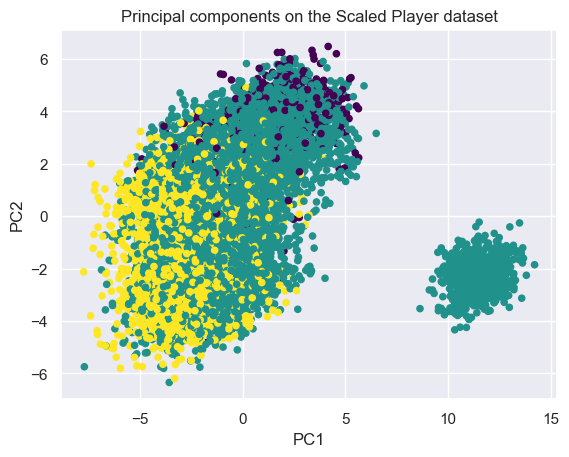

In [28]:
ax = plt.gca()
y = Pca_data['attacking_work_rate']
# sns.scatterplot(pc_scaled[:,0], pc_scaled[:,1], data=pc_scaled)
plt.scatter(pc_scaled[:,0], pc_scaled[:,1], c=y, s=20, cmap='viridis')
ax.set_title('Principal components on the Scaled Player dataset')
t = ax.set_xlabel('PC1')
t = ax.set_ylabel('PC2')

Text(0.5, 1.0, 'Scree plot for scaled data')

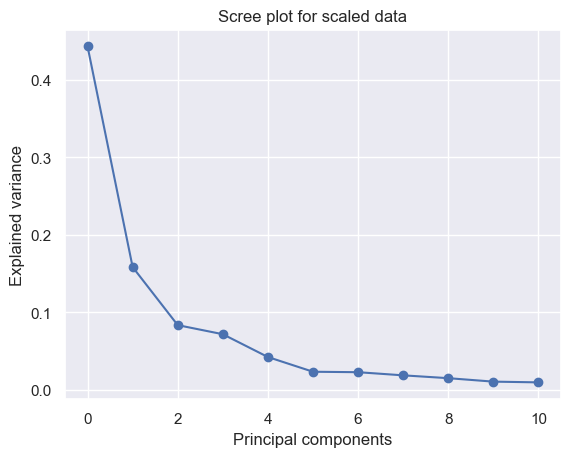

In [29]:
ax = plt.gca()
ax.plot(explained_var1, marker='o')
ax.set_xlabel('Principal components')
ax.set_ylabel('Explained variance')
ax.set_title('Scree plot for scaled data')

In [30]:
Corr_data = Corr_data.drop(['player_fifa_api_id', 'date', 'birthday', 'player_name'], axis=1)
scaling = StandardScaler()
scaled_corr_data = scaling.fit_transform(Corr_data)

pca_1 = PCA(n_components=0.9)
pca_corr = pca_1.fit_transform(scaled_corr_data)
expl_var = pca_1.explained_variance_ratio_



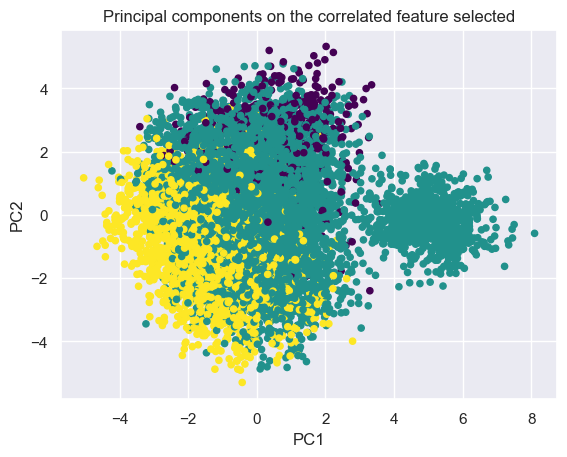

In [31]:
ax = plt.gca()
y = Pca_data['attacking_work_rate']
plt.scatter(pca_corr[:,0], pca_corr[:,1], c=y, s=20, cmap='viridis')
ax.set_title('Principal components on the correlated feature selected')
t = ax.set_xlabel('PC1')
t = ax.set_ylabel('PC2')

In [32]:
pca_corr.shape

(10410, 8)

### Modeling Dataset 

We will model the data based on the feature selection through pure dataset pca and correlated dataset pca using kmeans

In [34]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3, init='k-means++', random_state=421, max_iter=1000)
kmean.fit(pc_scaled)
kmean.labels_

array([0, 2, 1, ..., 1, 1, 1])

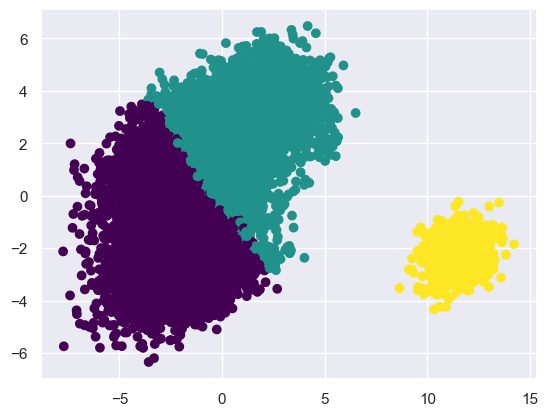

In [35]:
#Visualizing the data after setting our k to 5 

plt.scatter(pc_scaled[:,0], pc_scaled[:,1], c=kmean.labels_, cmap='viridis')

### Kmean Inertia 

Lets derive the value of k cluster that will give optimum result 

In [36]:
inertia = []

for k in range(1,10):
    kmean = KMeans(n_clusters=k, random_state=421, max_iter=1000)
    kmean.fit(pc_scaled)
    inertia.append(np.sqrt(kmean.inertia_))



Text(0, 0.5, 'Sum of square distance')

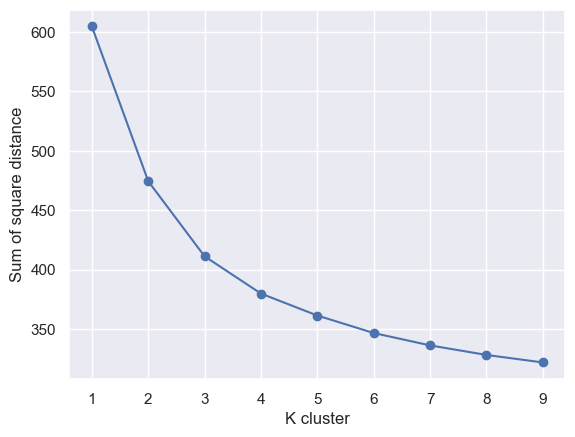

In [37]:
# Let plot an elbow graph of the inertia and k means 

plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('K cluster')
plt.ylabel('Sum of square distance')

From the Elbow graph above K = 4 would give the optimum clusters 

In [38]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=421, max_iter=500)
kmean.fit(pc_scaled)
label1= kmean.labels_

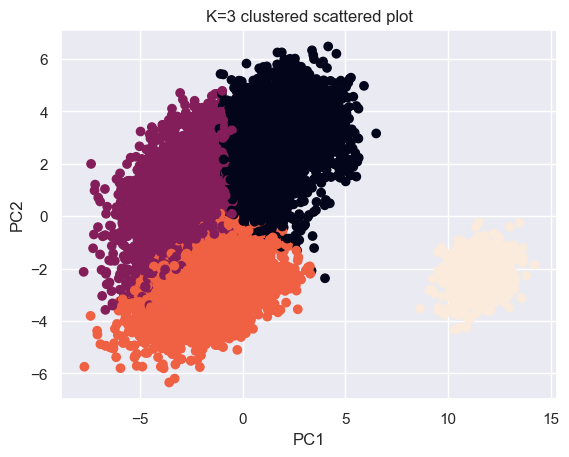

In [39]:
plt.scatter(pc_scaled[:,0], pc_scaled[:,1], c=label1,)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K=3 clustered scattered plot')
plt.show()

Lets perform Kmean clustering on the uncorrelated features pca

In [40]:
kmean2 = KMeans(n_clusters=4, init='k-means++', random_state=421, max_iter=1000)
kmean2.fit(pca_corr)
kmean2.labels_

array([3, 2, 1, ..., 0, 1, 0])

Text(0.5, 1.0, 'K=3 clustered scattered plot')

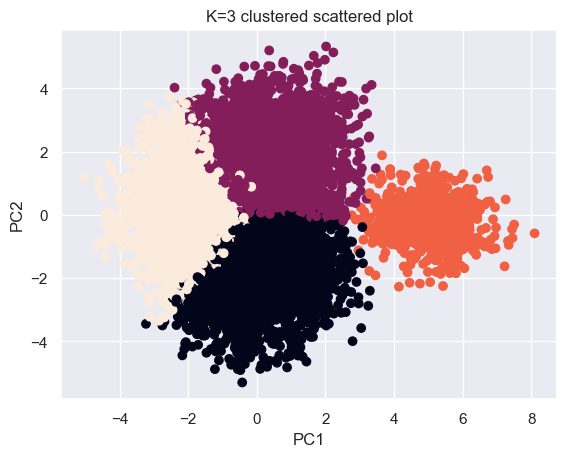

In [41]:
plt.scatter(pca_corr[:,0], pca_corr[:,1], c=kmean2.labels_,)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K=3 clustered scattered plot')

In [42]:
inertia2 = []

for k in range(1,12): #we have 11 columns in the pc scaled dataset 
    kmean = KMeans(n_clusters=k, random_state=421, max_iter=500)
    kmean.fit(pc_scaled)
    inertia2.append(np.sqrt(kmean.inertia_))

Text(0, 0.5, 'sum of squared distance')

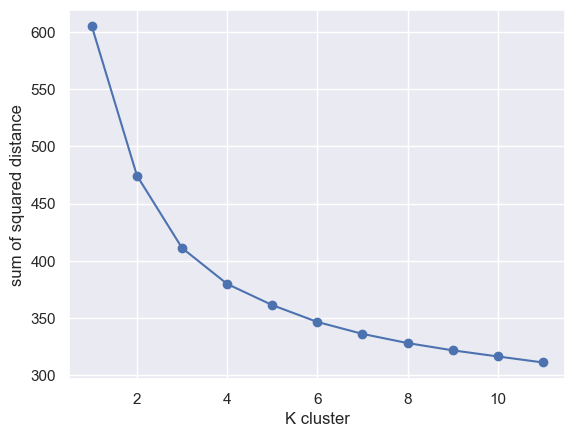

In [43]:
plt.plot(range(1,12), inertia2, marker='o')
plt.xlabel('K cluster')
plt.ylabel('sum of squared distance')

In [44]:
kmean2 = KMeans(n_clusters=4, init='k-means++', random_state=421, max_iter=500)
kmean2.fit(pca_corr)
kmean2.labels_

array([3, 2, 1, ..., 0, 1, 0])

Text(0.5, 1.0, 'K=4 clustered scattered plot')

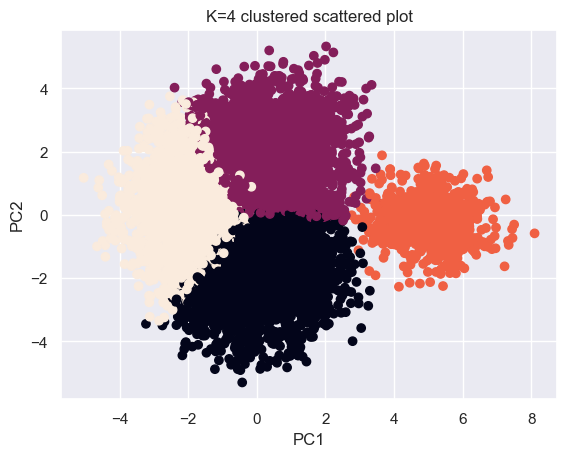

In [60]:
plt.scatter(pca_corr[:,0], pca_corr[:,1], c=kmean2.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K=4 clustered scattered plot')

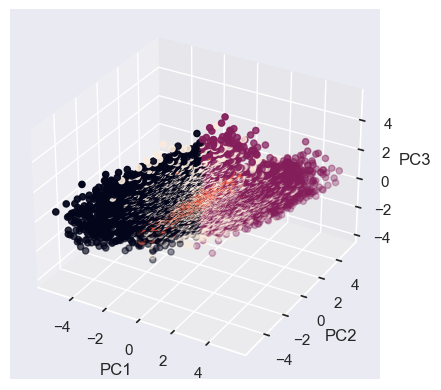

In [46]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x=pca_corr[:,0]
y=x=pca_corr[:,1]
z=pca_corr[:,2]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(x,y,z,c=kmean2.labels_)

plt.show()

In [47]:
#Counting numbers of label in each cluster 
pd.Series(label1).value_counts()

2    3553
0    2999
1    2962
3     896
dtype: int64

In [48]:
# calculating how good the metrics is 
# calculating silhouette coefficient for k =4
from sklearn import metrics

metrics.silhouette_score(pc_scaled, label1)

0.24188007930638888

In [49]:
#Predicting the value 
cluster_labels = kmean.fit_predict(pc_scaled)

In [50]:
preds = label1
kmeans_df = pd.DataFrame(Players)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,player_fifa_api_id,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight,KMeans_Clusters
64694,2,2016-05-12,69.0,69.0,1,2,75.0,50.0,59.0,71.0,...,14.0,5.0,15.0,10.0,12.0,Giovanni Pasquale,1982-01-05,182.88,181,1
6769,6,2011-08-30,70.0,70.0,1,1,12.0,12.0,15.0,25.0,...,69.0,70.0,66.0,73.0,70.0,Alessio Scarpi,1973-04-19,187.96,183,3
152758,11,2015-03-27,63.0,63.0,1,2,59.0,49.0,54.0,68.0,...,6.0,7.0,10.0,7.0,12.0,Romain Rocchi,1981-10-02,182.88,165,1
105628,16,2014-04-11,70.0,70.0,1,0,71.0,65.0,61.0,69.0,...,8.0,11.0,12.0,10.0,10.0,Luis Garcia,1981-02-06,177.80,152,2
83322,27,2016-04-14,71.0,71.0,1,0,80.0,64.0,41.0,77.0,...,9.0,6.0,13.0,16.0,7.0,Joe Cole,1981-11-08,175.26,161,2
108606,28,2015-11-12,73.0,73.0,1,1,25.0,13.0,14.0,22.0,...,75.0,74.0,68.0,72.0,73.0,Manu Herrera,1981-09-29,182.88,165,3
12773,41,2015-10-16,88.0,88.0,2,1,79.0,73.0,54.0,92.0,...,6.0,13.0,6.0,13.0,7.0,Andres Iniesta,1984-05-11,170.18,150,1
68042,58,2016-03-10,68.0,68.0,1,1,65.0,22.0,67.0,64.0,...,7.0,13.0,16.0,8.0,7.0,Guy Demel,1981-06-13,187.96,194,0
40178,61,2012-02-22,66.0,70.0,1,1,61.0,53.0,42.0,58.0,...,8.0,13.0,7.0,9.0,9.0,David Odonkor,1984-02-21,172.72,163,2
50293,80,2016-03-10,74.0,74.0,1,1,78.0,68.0,43.0,80.0,...,7.0,11.0,7.0,14.0,8.0,Emre Belozoglu,1980-09-07,170.18,159,1


In [53]:
Clusters = kmeans_df[kmeans_df.KMeans_Clusters.isin([3])]
Clusters

,player_fifa_api_id,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight,KMeans_Clusters
6769,6,2011-08-30,70.0,70.0,1,1,12.0,12.0,15.0,25.0,...,69.0,70.0,66.0,73.0,70.0,Alessio Scarpi,1973-04-19,187.96,183,3
108606,28,2015-11-12,73.0,73.0,1,1,25.0,13.0,14.0,22.0,...,75.0,74.0,68.0,72.0,73.0,Manu Herrera,1981-09-29,182.88,165,3
39722,185,2013-03-08,65.0,65.0,1,1,16.0,12.0,15.0,26.0,...,65.0,63.0,71.0,70.0,61.0,David James,1970-08-01,193.04,209,3
57700,268,2011-02-22,67.0,72.0,1,1,11.0,10.0,11.0,27.0,...,68.0,67.0,68.0,75.0,61.0,Francesco Arnau,1975-03-23,185.42,179,3
56800,603,2014-02-28,67.0,67.0,1,1,25.0,25.0,25.0,21.0,...,65.0,69.0,62.0,67.0,64.0,Flavio Roma,1974-06-21,190.50,190,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22189,231073,2016-01-21,59.0,70.0,1,1,15.0,19.0,15.0,31.0,...,64.0,58.0,55.0,57.0,62.0,Boris Radunovic,1996-05-26,193.04,185,3
125493,231545,2016-05-12,69.0,77.0,1,1,12.0,5.0,14.0,26.0,...,72.0,68.0,56.0,70.0,76.0,Miguel Silva,1995-04-07,187.96,172,3
4499,231691,2016-03-10,70.0,86.0,1,1,13.0,6.0,13.0,52.0,...,72.0,71.0,69.0,71.0,72.0,Alban Lafont,1999-01-23,193.04,170,3
89779,232350,2016-04-21,54.0,66.0,1,1,12.0,6.0,14.0,22.0,...,58.0,50.0,58.0,54.0,58.0,Josip Posavec,1996-03-10,190.50,181,3


In [55]:
Clusters_2 = kmeans_df[kmeans_df.KMeans_Clusters.isin([2])]
Clusters_2

,player_fifa_api_id,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight,KMeans_Clusters
105628,16,2014-04-11,70.0,70.0,1,0,71.0,65.0,61.0,69.0,...,8.0,11.0,12.0,10.0,10.0,Luis Garcia,1981-02-06,177.80,152,2
83322,27,2016-04-14,71.0,71.0,1,0,80.0,64.0,41.0,77.0,...,9.0,6.0,13.0,16.0,7.0,Joe Cole,1981-11-08,175.26,161,2
40178,61,2012-02-22,66.0,70.0,1,1,61.0,53.0,42.0,58.0,...,8.0,13.0,7.0,9.0,9.0,David Odonkor,1984-02-21,172.72,163,2
150026,195,2011-02-22,64.0,84.0,1,1,35.0,81.0,61.0,65.0,...,5.0,12.0,6.0,7.0,9.0,Robbie Fowler,1975-04-09,180.34,172,2
71035,201,2013-05-10,68.0,68.0,2,1,71.0,58.0,48.0,78.0,...,10.0,9.0,5.0,8.0,13.0,Hugo Leal,1980-05-21,180.34,165,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43017,233027,2016-03-03,60.0,75.0,1,1,23.0,58.0,70.0,60.0,...,15.0,10.0,6.0,15.0,8.0,Dennis van der Heijden,1997-02-17,193.04,165,2
26861,233139,2016-05-05,54.0,68.0,1,1,30.0,61.0,61.0,39.0,...,9.0,9.0,9.0,7.0,7.0,Cedric Itten,1996-12-27,185.42,176,2
93016,233222,2016-04-28,56.0,75.0,1,1,45.0,44.0,41.0,52.0,...,10.0,14.0,8.0,9.0,13.0,Kamil Jozwiak,1998-04-22,175.26,154,2
85091,233231,2016-03-03,60.0,74.0,1,1,38.0,60.0,61.0,45.0,...,9.0,11.0,9.0,11.0,13.0,Jon Bautista,1995-07-03,177.80,159,2


In [56]:
Clusters_1 = kmeans_df[kmeans_df.KMeans_Clusters.isin([1])]
Clusters_1

,player_fifa_api_id,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight,KMeans_Clusters
64694,2,2016-05-12,69.0,69.0,1,2,75.0,50.0,59.0,71.0,...,14.0,5.0,15.0,10.0,12.0,Giovanni Pasquale,1982-01-05,182.88,181,1
152758,11,2015-03-27,63.0,63.0,1,2,59.0,49.0,54.0,68.0,...,6.0,7.0,10.0,7.0,12.0,Romain Rocchi,1981-10-02,182.88,165,1
12773,41,2015-10-16,88.0,88.0,2,1,79.0,73.0,54.0,92.0,...,6.0,13.0,6.0,13.0,7.0,Andres Iniesta,1984-05-11,170.18,150,1
50293,80,2016-03-10,74.0,74.0,1,1,78.0,68.0,43.0,80.0,...,7.0,11.0,7.0,14.0,8.0,Emre Belozoglu,1980-09-07,170.18,159,1
63515,164,2016-05-12,73.0,73.0,1,2,71.0,59.0,68.0,77.0,...,5.0,15.0,7.0,6.0,13.0,Giampiero Pinzi,1981-03-11,180.34,161,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99278,231493,2016-02-04,67.0,75.0,2,2,65.0,58.0,44.0,71.0,...,7.0,12.0,7.0,6.0,12.0,Laszlo Kleinheisler,1994-04-08,172.72,154,1
97772,231885,2016-03-17,69.0,69.0,2,1,76.0,48.0,48.0,69.0,...,6.0,9.0,6.0,7.0,5.0,Kosuke Ota,1987-07-23,177.80,172,1
155003,231969,2016-03-17,71.0,77.0,1,1,70.0,71.0,69.0,72.0,...,6.0,6.0,12.0,15.0,13.0,Ruslan Malinovsky,1993-05-04,180.34,174,1
31778,232183,2016-05-05,68.0,72.0,1,1,62.0,22.0,53.0,61.0,...,11.0,7.0,6.0,10.0,12.0,Collins Fai,1992-08-13,167.64,132,1


In [57]:
Clusters_0 = kmeans_df[kmeans_df.KMeans_Clusters.isin([0])]
Clusters_0

,player_fifa_api_id,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight,KMeans_Clusters
68042,58,2016-03-10,68.0,68.0,1,1,65.0,22.0,67.0,64.0,...,7.0,13.0,16.0,8.0,7.0,Guy Demel,1981-06-13,187.96,194,0
122628,158,2011-08-30,69.0,69.0,1,1,71.0,33.0,65.0,64.0,...,12.0,6.0,6.0,12.0,6.0,Michael Ball,1979-10-02,177.80,181,0
164245,388,2011-02-22,75.0,79.0,1,1,20.0,28.0,81.0,54.0,...,11.0,7.0,12.0,5.0,9.0,Sol Campbell,1974-09-18,187.96,190,0
86442,492,2014-11-14,73.0,73.0,1,1,62.0,31.0,72.0,69.0,...,13.0,5.0,14.0,13.0,9.0,Jonathan Zebina,1978-07-19,187.96,190,0
30910,607,2013-04-05,61.0,61.0,1,1,21.0,33.0,55.0,38.0,...,10.0,12.0,15.0,8.0,6.0,Clarke Carlisle,1979-10-14,190.50,174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50807,233885,2016-05-12,52.0,69.0,1,1,29.0,18.0,52.0,31.0,...,6.0,8.0,5.0,7.0,6.0,Eray Cumart,1998-02-04,180.34,176,0
88873,233911,2016-05-05,58.0,66.0,1,1,51.0,25.0,41.0,51.0,...,5.0,8.0,6.0,9.0,5.0,Jose Matos,1995-05-06,170.18,150,0
58304,233930,2016-05-12,59.0,66.0,2,1,55.0,28.0,50.0,35.0,...,7.0,10.0,7.0,9.0,9.0,Francisco Afonso,1997-04-24,175.26,152,0
60179,233969,2016-05-12,58.0,68.0,1,1,48.0,26.0,57.0,49.0,...,8.0,8.0,12.0,12.0,6.0,Fynn Arkenberg,1996-03-04,187.96,176,0


## Hierarchical Clustering 
Aggolometric hierarchical clustering 

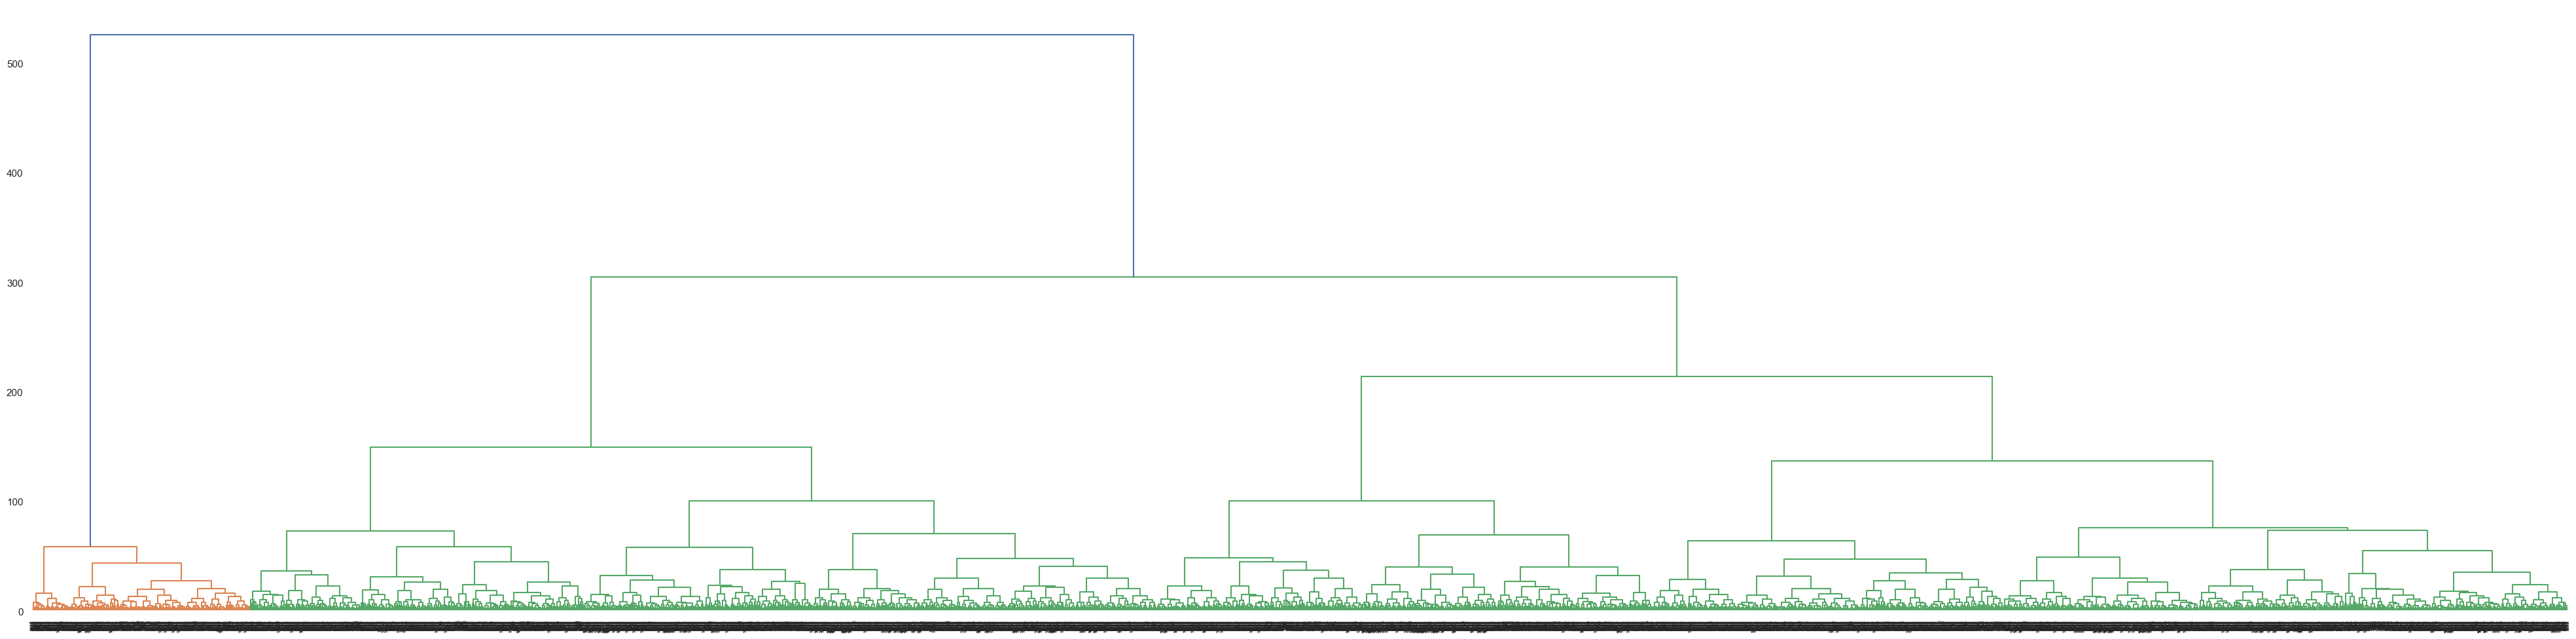

In [80]:
#plotting dendogram
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(pc_scaled,method='ward'))

From the above dendogram we can see that we can select our number of cluster from 2 to 6. However, the number of suitable cluster for this task as shown in the dendogram above is 2

In [81]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(pc_scaled)
hcluster_label = hcluster.labels_

In [82]:
hcluster_df = pd.DataFrame(Players)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head(10)

,player_fifa_api_id,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,KMeans_Clusters,hcluster
64694,2,2016-05-12,69.0,69.0,1,2,75.0,50.0,59.0,71.0,...,70.0,69.0,69.0,14.0,5.0,15.0,10.0,12.0,1,0
6769,6,2011-08-30,70.0,70.0,1,1,12.0,12.0,15.0,25.0,...,16.0,9.0,17.0,69.0,70.0,66.0,73.0,70.0,0,1
152807,11,2015-03-27,63.0,63.0,1,2,59.0,49.0,54.0,68.0,...,42.0,54.0,52.0,6.0,7.0,10.0,7.0,12.0,2,0
105628,16,2014-04-11,70.0,70.0,1,0,71.0,65.0,61.0,69.0,...,26.0,35.0,21.0,8.0,11.0,12.0,10.0,10.0,1,0
83322,27,2016-04-14,71.0,71.0,1,0,80.0,64.0,41.0,77.0,...,35.0,34.0,30.0,9.0,6.0,13.0,16.0,7.0,1,0
108606,28,2015-11-12,73.0,73.0,1,1,25.0,13.0,14.0,22.0,...,11.0,13.0,14.0,75.0,74.0,68.0,72.0,73.0,0,1
12773,41,2015-10-16,88.0,88.0,2,1,79.0,73.0,54.0,92.0,...,57.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,1,0
68042,58,2016-03-10,68.0,68.0,1,1,65.0,22.0,67.0,64.0,...,68.0,73.0,68.0,7.0,13.0,16.0,8.0,7.0,2,0
40178,61,2012-02-22,66.0,70.0,1,1,61.0,53.0,42.0,58.0,...,22.0,26.0,31.0,8.0,13.0,7.0,9.0,9.0,1,0
50293,80,2016-03-10,74.0,74.0,1,1,78.0,68.0,43.0,80.0,...,64.0,66.0,65.0,7.0,11.0,7.0,14.0,8.0,1,0
